In [1]:
#import principal libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/rdazmn/FYP/master/ML-MATT-CompetitionQT1920_train2.csv'
url2 = 'https://raw.githubusercontent.com/rdazmn/FYP/master/ML-MATT-CompetitionQT1920_test.csv'
data_train = pd.read_csv(url, error_bad_lines=False)
data_test =pd.read_csv(url2,error_bad_lines=False)

In [3]:
print("Size: {}".format(data_train.shape))
print(data_train.describe())

Size: (36904, 14)
         PRBUsageUL    PRBUsageDL    meanThr_DL    meanThr_UL     maxThr_DL  \
count  36904.000000  36904.000000  36904.000000  36904.000000  36904.000000   
mean       7.835090      2.106396      0.560525      0.067610     17.764369   
std        8.428206      2.247514      0.727623      0.186555     15.739932   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.213000      0.707000      0.140000      0.021000      5.710750   
50%        4.547000      1.314000      0.352000      0.040000     14.170000   
75%       12.126000      2.728000      0.718000      0.075000     25.059500   
max       51.333000     77.505000     19.601000     12.461000    140.008000   

          maxThr_UL     meanUE_DL     meanUE_UL      maxUE_DL      maxUE_UL  \
count  36904.000000  36904.000000  36904.000000  36815.000000  36815.000000   
mean       1.791974      1.173441      0.665143      4.190819      3.063371   
std        5.028928      0.214065

In [4]:
#Change object to float64

data_train['Time'] = pd.to_datetime(data_train['Time'],format='%H:%M').dt.hour
data_train['maxUE_UL_DL'] = pd.to_numeric(data_train['maxUE_UL_DL'],errors='coerce')

In [5]:
#Data cleaning
data_train['maxUE_DL'] = data_train['maxUE_DL'].replace(np.nan, 0)
data_train['maxUE_UL'] = data_train['maxUE_UL'].replace(np.nan, 0)
data_train['maxUE_UL_DL'] = data_train['maxUE_UL_DL'].replace('#¡VALOR!',0)
data_train['maxUE_UL_DL'] = data_train['maxUE_UL_DL'].replace(np.nan,0)

In [6]:
corr = data_train.corr()
corr

,Time,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL_DL,Unusual
Time,1.000000,0.265110,0.241903,0.171482,0.099915,0.212551,0.065024,0.315440,0.038905,0.383785,0.348901,0.381252,0.016134
PRBUsageUL,0.265110,1.000000,0.449178,0.482782,0.286596,0.461718,0.217282,0.659076,0.548276,0.706480,0.805479,0.775931,-0.117299
PRBUsageDL,0.241903,0.449178,1.000000,0.793071,0.250486,0.452983,0.298500,0.607479,0.002317,0.612835,0.598111,0.627399,-0.090100
meanThr_DL,0.171482,0.482782,0.793071,1.000000,0.299374,0.629836,0.486367,0.488197,0.086440,0.494925,0.503743,0.516090,-0.065517
meanThr_UL,0.099915,0.286596,0.250486,0.299374,1.000000,0.199296,0.409001,0.233858,0.026614,0.236320,0.241817,0.247010,-0.035196
maxThr_DL,0.212551,0.461718,0.452983,0.629836,0.199296,1.000000,0.337199,0.427594,0.125389,0.502608,0.474787,0.507402,-0.066574
maxThr_UL,0.065024,0.217282,0.298500,0.486367,0.409001,0.337199,1.000000,0.151108,-0.077402,0.184234,0.180672,0.189005,-0.020630
meanUE_DL,0.315440,0.659076,0.607479,0.488197,0.233858,0.427594,0.151108,1.000000,0.237731,0.869910,0.826676,0.880442,-0.168308
meanUE_UL,0.038905,0.548276,0.002317,0.086440,0.026614,0.125389,-0.077402,0.237731,1.000000,0.202267,0.361624,0.281642,-0.027191
maxUE_DL,0.383785,0.706480,0.612835,0.494925,0.236320,0.502608,0.184234,0.869910,0.202267,1.000000,0.866195,0.973916,-0.136408


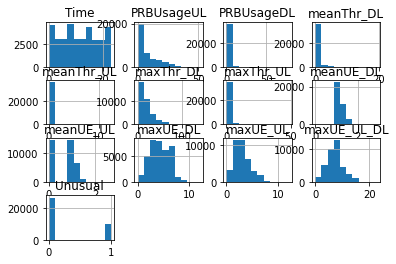

In [9]:
data_train.hist()
plt.show()

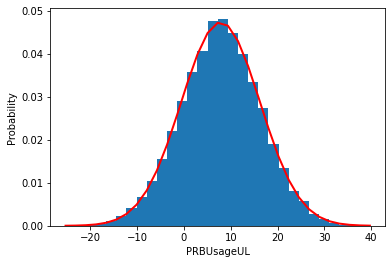

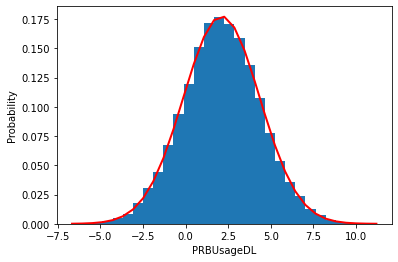

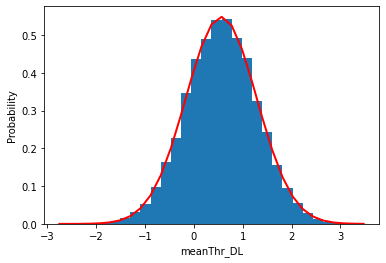

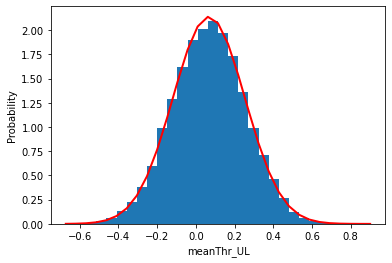

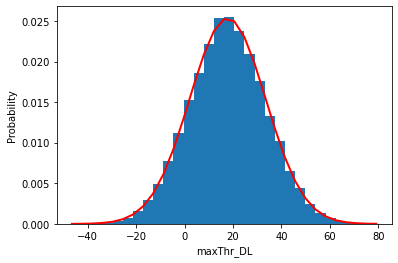

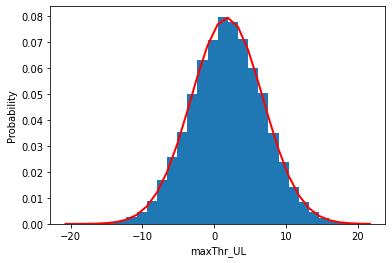

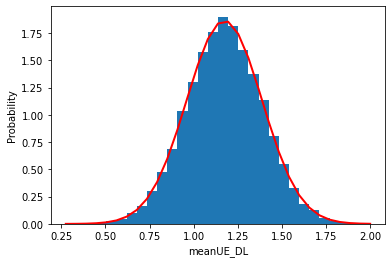

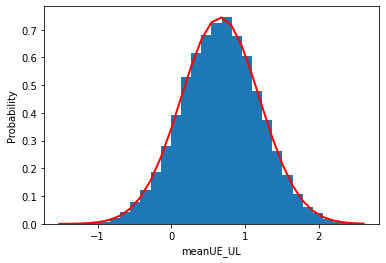

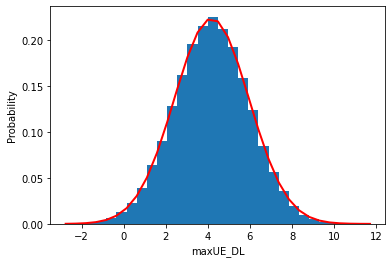

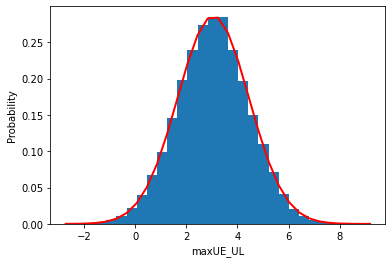

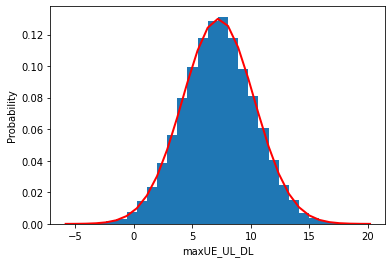

In [10]:
data_norm = data_train.iloc[:,2:13]
for column in data_norm.columns:
    mu, sigma = data_norm[column].mean(), data_norm[column].std()
    s = np.random.normal(mu, sigma, data_norm[column].count())
    count, bins, ignored = plt.hist(s, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.xlabel(data_norm[column].name)
    plt.ylabel("Probability")
    plt.show()

In [12]:
X = data_train.iloc[:,2:13]
y = data_train.iloc[:,13]
y = y.astype('int')

#Split into train and test set using sklearn model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.650316 (0.013682)
LDA: 0.649581 (0.014054)
KNN: 0.712878 (0.010780)
CART: 0.953629 (0.010790)
XGB: 0.998617 (0.000429)
RF: 0.977049 (0.002066)


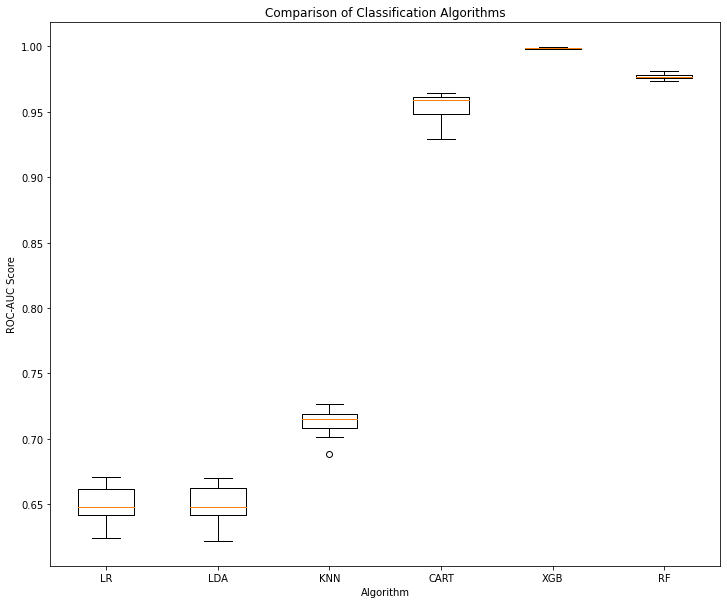

In [17]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()